In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [4]:
read_file = pd.read_csv ('dataForTrainingLogistic.txt', sep = " ", header = None)
read_file.to_csv ('dataForTrainingLogistic.csv', index=None)

In [12]:
with open('dataForTrainingLogistic.csv') as f:
    reader = csv.reader(f)
    next(reader)
    
    data = []
    for row in reader:
        data.append({
            "bias": [1],
            "evidence": [float(cell) for cell in row[:6]],
            "label": [int(cell) for cell in row[6]]
        })
        
bias = np.array([row["bias"] for row in data])
features = np.array([row["evidence"] for row in data])
features = np.append(bias, features, axis=1) # what does this function do ? (400, 7)
labels = np.array([row["label"] for row in data]) #(400, 1)
weights = np.zeros((7, 1)) # initalize weights of shape (7, 1)
print(features)

[[1.  0.4 0.8 ... 0.9 0.1 0.6]
 [1.  0.3 0.7 ... 0.9 0.2 0. ]
 [1.  0.4 0.6 ... 1.  0.6 0.7]
 ...
 [1.  1.  0.1 ... 0.4 0.8 0. ]
 [1.  0.6 0.4 ... 0.8 0.7 0.2]
 [1.  1.  0.1 ... 0.6 1.  0.1]]


In [13]:
# sigmoid activation function
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

In [14]:
def predict(features, weights):
    ''' 
    Returns 1d array of probabilities 
    that class label = 1
    '''
    z = np.dot(features, weights)
    return sigmoid(z)

In [15]:
def cost_function(features, labels, weights):
     
    observations = len(labels)
    predictions = predict(features, weights)
    
    # take error when label = 1 
    class1_cost = -labels * np.log(predictions)
    
    # take error when label = 0 
    class0_cost = (1 - labels) * np.log(1 - predictions)
    
    # sum of both costs
    cost = class1_cost - class0_cost
    cost = cost.sum() / observations # mean 
    
    return cost
    

In [16]:
def grad_descent(features, labels, weights, lr):
    '''
    Vectorized gradient ascent
    
    Features: ()
    Labels: ()
    Weights: ()
    '''
    N = len(features)
    # get predictions 
    predictions = predict(features, weights)
    # transpose feature matrix to multiply it with the error
    gradient = np.dot(features.T, predictions - labels)
    
    # take the average 
    gradient /= N
    # multiply with the learning rate
    gradient *= lr
    
    # subtract from weights to minimize cost 
    weights -= gradient
    
    return weights

In [17]:
new_weights = grad_descent(features, labels, np.copy(weights), 0.01)
print(new_weights)
print(weights)

[[ 1.25000e-04]
 [-1.10750e-03]
 [ 1.33125e-03]
 [-1.11375e-03]
 [ 1.31375e-03]
 [-9.73750e-04]
 [-4.50000e-05]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [18]:
# define decision boundry
def decision_boundary(prob):
    for p in prob:
        return 1 if p >= 0.5 else 0

In [19]:
def classify(predictions):
    classifications = []
    for pred in predictions:
        classifications.append(decision_boundary(pred))
    return classifications

In [20]:
def train(features, labels, weights, lr, epochs):
    cost_history = []
    
    for epoch in range(epochs):
        weights = grad_descent(features, labels, weights, lr)
        
        # calculate error 
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)
        
        # print cost every 1000 iteration
        if epoch % 1000 == 0:
            print(f"epoch: {epoch},  cost: {cost}")
            
    return weights, cost_history

In [21]:
updated_weights, history = train(features, labels, np.copy(weights), 0.01, 10000)
print(updated_weights)
print(weights)

epoch: 0,  cost: 0.6924543586466683
epoch: 1000,  cost: 0.3280154893618599
epoch: 2000,  cost: 0.2133405564327551
epoch: 3000,  cost: 0.1601449376303064
epoch: 4000,  cost: 0.12958723538908332
epoch: 5000,  cost: 0.1097057571289698
epoch: 6000,  cost: 0.09569082346210855
epoch: 7000,  cost: 0.08524673757879687
epoch: 8000,  cost: 0.07714060732698584
epoch: 9000,  cost: 0.07065100042543399
[[ 0.52996161]
 [-2.44544139]
 [ 3.28183652]
 [-2.46798885]
 [ 3.19871746]
 [-2.04440476]
 [ 0.04013301]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


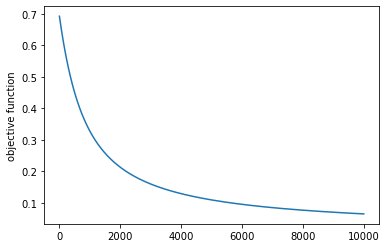

In [22]:
# plot objective function and number of iteration
plt.plot(history)
plt.ylabel("objective function")
plt.show()

In [64]:
with open('dataForTestingLogistic.csv') as f:
    reader = csv.reader(f)
    next(reader)
    
    data_test = []
    for row in reader:
        data_test.append({
            "bias": [1],
            "evidence": [float(cell) for cell in row[:6]],
            "label": [int(cell) for cell in row[6]]
        })
        
bias_test = np.array([row["bias"] for row in data_test])
features_t = np.array([row["evidence"] for row in data_test])
features_t = np.append(bias_test, features_t, axis=1) # what does this function do ? (400, 7)
labels_test = np.array([row["label"] for row in data]).flatten() #(400, 1)
print(len(labels_test))

100


In [80]:
def test(features_t, weights_t):
    predictions = predict(features_t, weights_t)
    # compare new labels with old labels
    new_labels = classify(predictions)
    return new_labels

In [84]:
predicted_labels = test(features_t, updated_weights)
print(predicted_labels)

[0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1]


In [85]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

In [87]:
accuracy(predicted_labels, labels_test)

1.0

In [ ]:
def stoch_grad_descent(features, labels, weights, lr):
    '''
    Vectorized gradient ascent
    
    Features: ()
    Labels: ()
    Weights: ()
    '''
    # get predictions 
    predictions = predict(features, weights)
    # transpose feature matrix to multiply it with the error
    gradient = np.dot(features.T, predictions - labels)
    
    # take the average 
    gradient /= N
    # multiply with the learning rate
    gradient *= lr
    
    # subtract from weights to minimize cost 
    weights -= gradient
    
    return weights